In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, log_loss, make_scorer,roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold, RandomizedSearchCV
plt.style.use('seaborn')

In [3]:
from src.clean_data import get_model_data
%load_ext autoreload
%autoreload 2

In [4]:
def cross_val(classifier, X, y):
    kf = KFold(n_splits=5, shuffle=True)
    accuracy = []
    rmse=[]
    model = classifier 
    
    for train, test in kf.split(X):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        
        model.fit(X_train, y_train)

        pred = model.predict(X_test)
        accuracy.append(accuracy_score(y_test, pred))
        rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

    accuracy = np.mean(accuracy)
    rmse = np.mean(rmse)
    return model,accuracy,rmse


In [26]:
def random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    y_predict = model.predict(X_test)
    prob=model.predict_proba(X_test)
    #rmse = np.sqrt(mean_squared_error(y_test, y_predict))
    coeff = model.feature_importances_
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    print("accuracy score:", model.score(X_test, y_test))
    print("precision score:", precision_score(y_test, y_predict))
    print("recall:", recall_score(y_test, y_predict))
    return prob, accuracy, precision, recall

In [27]:
X_train,X_test,y_train,y_test=get_model_data('data/data.json')

In [28]:
prob, accuracy, precision, recall = random_forest(X_train,X_test,y_train,y_test)

accuracy score: 0.99302649930265
precision score: 0.9320388349514563
recall: 0.8421052631578947


In [10]:
np.mean(prob,axis=0)

array([0.96853835, 0.03146165])

In [11]:
np.max(prob,axis=0)

array([1., 1.])

In [ ]:
np.unique(prob,axis=0)

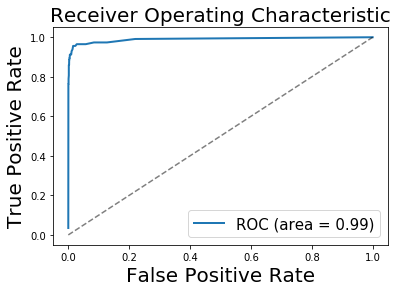

In [13]:
fig,ax = plt.subplots();
plot_roc_curve(prob[:,1],y_test,ax,'ROC');

In [29]:
fpr,tpr,thresholds=roc_curve(y_test,prob[:,1])
auc = roc_auc_score(y_test, prob[:,1])

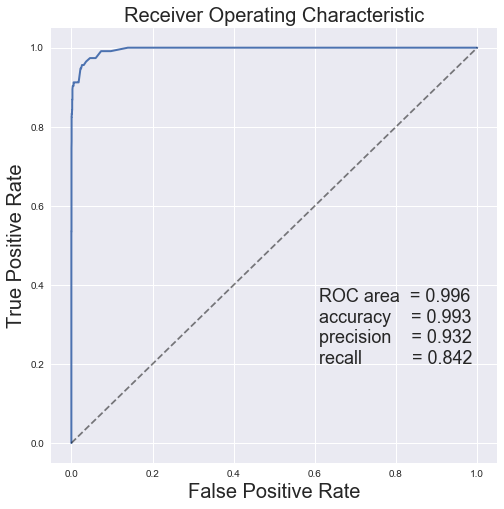

In [38]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(fpr, tpr, label='area = %2.2f' % auc, lw=2)
ax.text(.61,.2,'\n'.join([
    'ROC area  = %2.3f' % auc,
    'accuracy    = %2.3f' % accuracy,
    'precision    = %2.3f' % precision,
    'recall          = %2.3f' % recall
]), fontsize=18)
ax.set_xlabel('False Positive Rate', fontsize=20)
ax.set_ylabel('True Positive Rate', fontsize=20)
ax.set_title('Receiver Operating Characteristic', fontsize=20)
ax.plot([0,1], [0,1], color='k', ls='--', alpha=.5);
fig.savefig('images/roc.png', bbox_inches='tight')